**Data Preparation:**

In [1]:
import pandas as pd

In [2]:
# The dataset was uppload via drag-and-drop into the notebook.
superstore_data = pd.read_excel('US Superstore data.xls')
superstore_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
superstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
# Are there any missing values ?
superstore_data.isnull() .sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


No missing values were found in the dataset.

In [5]:
# Are there any duplicate rows ?
duplicates = superstore_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [6]:
categorical_cols = ["Category", "Ship Mode", "Segment", "Region", "Sub-Category"]
for col in categorical_cols:
    print(f"Unique values in {col}: {superstore_data[col].unique()}\n")


Unique values in Category: ['Furniture' 'Office Supplies' 'Technology']

Unique values in Ship Mode: ['Second Class' 'Standard Class' 'First Class' 'Same Day']

Unique values in Segment: ['Consumer' 'Corporate' 'Home Office']

Unique values in Region: ['South' 'West' 'Central' 'East']

Unique values in Sub-Category: ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']



* No need to check: "State", "City" : contain a large number of unique values.
* "Customer Name", "Product Name": are also unique for each record, so no need to check.



# Everything looks good, the dataset is clean and ready for analysis !

**Data Visualization with Matplotlib:**

In [7]:
import matplotlib.pyplot as plt

* Create an interactive line chart to show sales trends over the years.

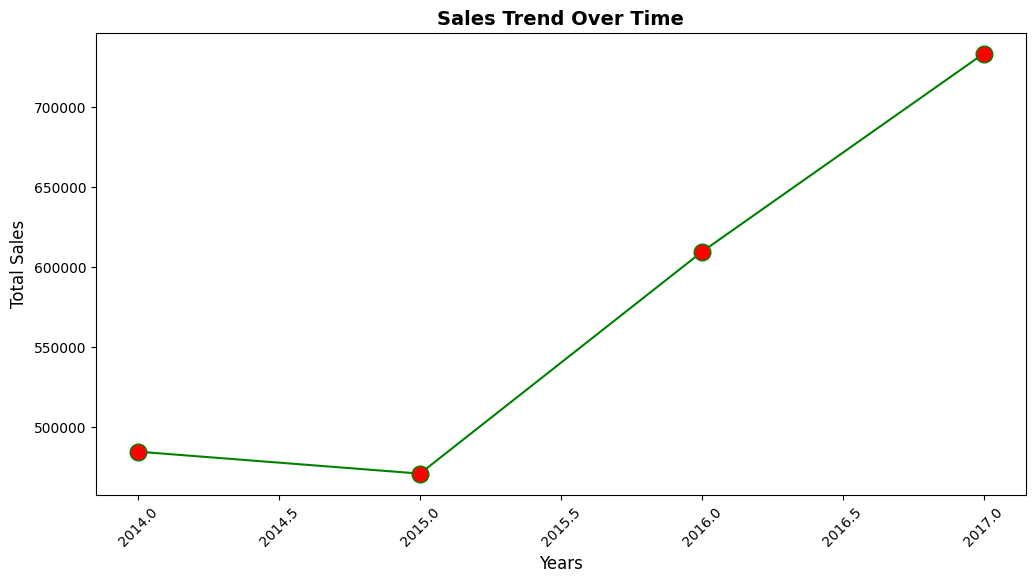

In [8]:
# Extract the year from "Order Date" and group by year
sales_trend = superstore_data.groupby(superstore_data['Order Date'].dt.year)['Sales'].sum().reset_index()

# Plot sales trend over years
plt.figure(figsize=(12, 6))
plt.plot(sales_trend['Order Date'], sales_trend['Sales'], color='green', marker='o', linestyle='-', markerfacecolor='red', markersize=12)

# Labels and title
plt.title('Sales Trend Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Years', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)

plt.show()

* Build an interactive map to visualize sales distribution by country.

Since the dataset only has "United States" as the only country, the best approach is to visualize sales by **state** instead.

In [9]:
import plotly.express as px

In [10]:
# US state name to abbreviation mapping
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Aggregate sales by state
state_sales = superstore_data.groupby("State")["Sales"].sum().reset_index()

# Convert full state names to abbreviations
state_sales["State"] = state_sales["State"].map(us_state_abbrev)

# Plot the sales distribution as a map
fig = px.choropleth(state_sales,
                    locations="State",
                    locationmode="USA-states",
                    color="Sales",
                    color_continuous_scale="blues",
                    scope="usa",
                    title="Sales Distribution Across US States")

fig.show()


**Data Visualization with Seaborn:**

* Use Seaborn to generate a bar chart showing top 10 products by sales.

In [11]:
import seaborn as sns

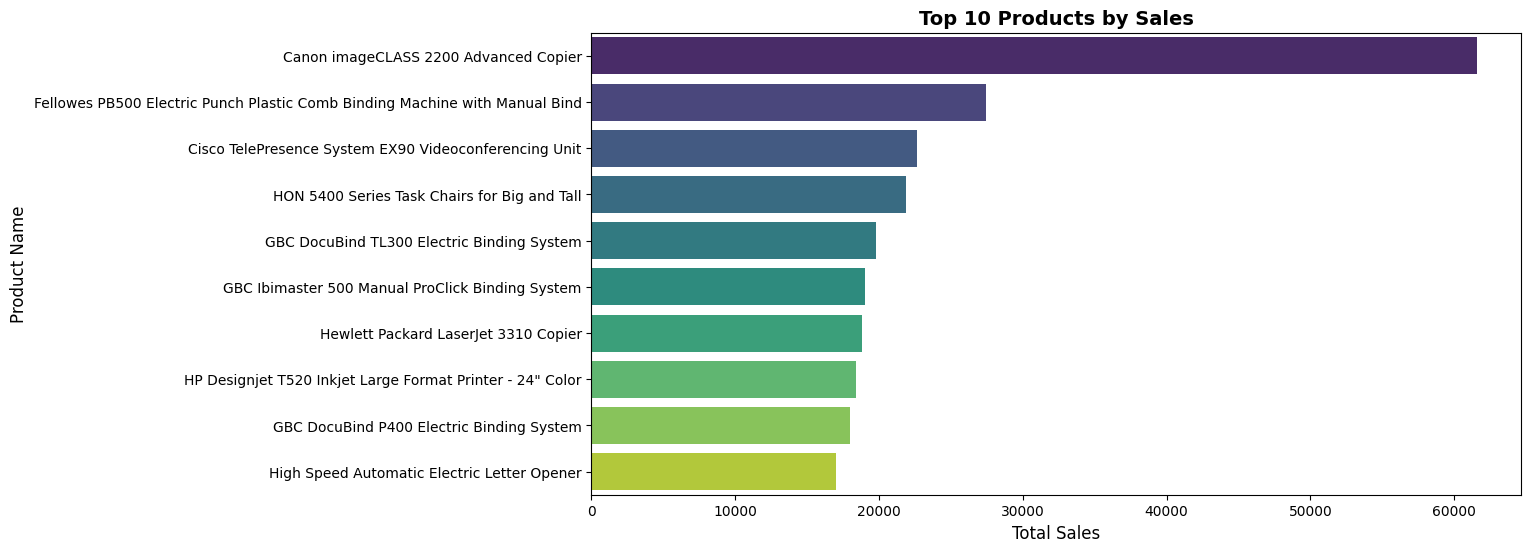

In [12]:
# Aggregate sales by product and get the top 10 products
top_products = superstore_data.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))

# Create the bar chart
sns.barplot(data=top_products, x="Sales", y="Product Name", hue="Product Name", palette="viridis")

# Titles and labels
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.title("Top 10 Products by Sales", fontsize=14, fontweight="bold")

# Show the plot
plt.show()


* Create a scatter plot to analyze the relationship between profit and discount.

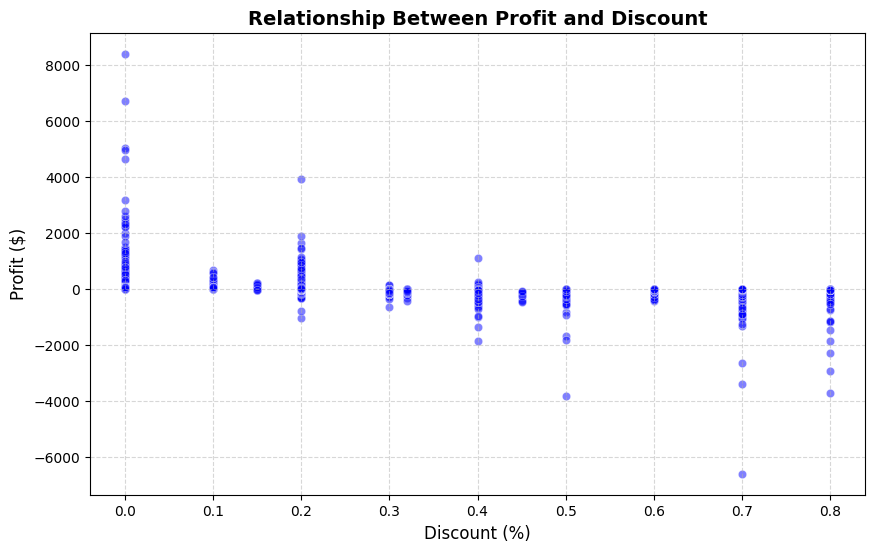

In [13]:
plt.figure(figsize=(10, 6))

# Create scatter plot
sns.scatterplot(data=superstore_data, x="Discount", y="Profit", alpha=0.5, color="blue")

# Titles and labels
plt.xlabel("Discount (%)", fontsize=12)
plt.ylabel("Profit ($)", fontsize=12)
plt.title("Relationship Between Profit and Discount", fontsize=14, fontweight="bold")

# Grid for better readability
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()

**Comparative Analysis:**

1. **Ease of use :**
      - **Matplotlib** : requires more manual configuration
      - **Seaborn** : More intuitive and concise
2. **Customization :**
      - **Matplotlib** : Highly customizable but requires extra code
      - **Seaborn** : Built-in features simplify customization
3. **Color Management** :
      - **Matplotlib** : Needs manual adjustments for color palettes
      - **Seaborn** : Automatically uses well-designed palettes
4. **Default Style** :  
      - **Matplotlib** : Basic, needs customization for better visuals
      - **Seaborn** : Modern, aesthetically pleasing default settings

5. **Best Use Case**
      - **Matplotlib** : When detailed control is needed
      - **Seaborn** : When fast, visually appealing plots are required

# **Conclusion**
If we need quick insights with minimal effort, Seaborn is the better choice.
If we require detailed control and customization, Matplotlib provides more flexibility.